In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
## Scatter Plot

In [10]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

plt.scatter(df['Weight'],df['Height'])
plt.show()

## Independent And Dependent Features

In [23]:
X = df[['Weight']] ## Independent features should always be in 2 dimensions

In [25]:
X.shape

(23, 1)

In [27]:
Y = df['Height']

In [29]:
Y.shape

(23,)

In [31]:
## Train test split
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state= 42)

In [35]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [37]:
## Standardization -- Training Data should be standardized with fit_transform function --- > there will be 2 output values -- mean value and SD 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [39]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [41]:
X_test = scaler.transform(X_test)

In [43]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [45]:
## Apply Simple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [49]:
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
## y = mx+c m = slope, c = coefficient
print('Coefficient or slope value is',regression.coef_)
print('Intercept value is',regression.intercept_)

Coefficient or slope value is [17.2982057]
Intercept value is 156.47058823529412


In [55]:
regression.predict(X_test)

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [57]:
## Plot the best fit line for training data

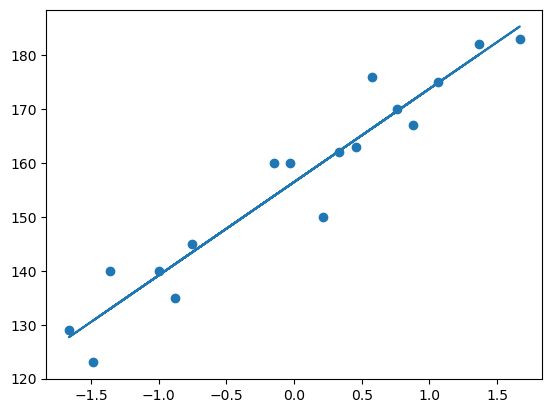

In [65]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [67]:
## Predicted point = intercept + coef(Weight data)
y_predicted = regression.predict(X_test)

In [69]:
y_predicted

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [71]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mse = mean_squared_error(y_test,y_predicted)

In [75]:
mse

114.84069295228699

In [77]:
mae = mean_absolute_error(y_test,y_predicted)

In [79]:
mae

9.665125886795005

In [81]:
rmse = np.sqrt(mse)
rmse

10.716374991212605

In [83]:
## Rsquare
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predicted)
print('Score value is',score)

Score value is 0.7360826717981276
